Overall objective is to identify factors that increase risk of heart disease. Questions to explore in analyzing the data:

Does age, race, or sex play a role in risk of heart disease? 
How does lifestyle impact risk of heart disease?
Are you more likely to get heart disease if you have another serious medical condition? 

In [1183]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

dataset = pd.read_csv('heart_2020_cleaned.csv')

Initial exploration of the data. Review the disparate values for each feature and keep an eye out for null and/or invalid values.

In [1145]:
dataset.describe()

dataset['HeartDisease'].value_counts()
dataset['Smoking'].value_counts()
dataset['AlcoholDrinking'].value_counts()
dataset['Stroke'].value_counts()
dataset['DiffWalking'].value_counts()
dataset['Sex'].value_counts()
dataset['AgeCategory'].value_counts()
dataset['Race'].value_counts()
dataset['Diabetic'].value_counts()
dataset['PhysicalActivity'].value_counts()
dataset['GenHealth'].value_counts()
dataset['Asthma'].value_counts()
dataset['KidneyDisease'].value_counts()
dataset['SkinCancer'].value_counts()


No     289976
Yes     29819
Name: SkinCancer, dtype: int64

In [1144]:
stroke = dataset['Stroke'].value_counts()[1]
diabetic = dataset['Diabetic'].value_counts()[1] + dataset['Diabetic'].value_counts()[3]
asthma = dataset['Asthma'].value_counts()[1]
kidneydis = dataset['KidneyDisease'].value_counts()[1]
skincancer = dataset['SkinCancer'].value_counts()[1]

other_cond = stroke + diabetic + asthma + kidneydis + skincancer

other_cond / dataset.shape[0] * 100

43.74677527791241

Next, analyze data to explore relationship between demographic info and rate of heart disease. 

In [237]:
subset = dataset[['Sex', 'HeartDisease']] # subset of original data, looking at sex & heart disease status
total_resp = subset.shape[0]

sex_split = subset.groupby('Sex').count()
sex_split.columns = sex_split.columns.str.replace('HeartDisease', 'Num Respondents')
sex_split['Share of Total'] = sex_split.apply(lambda x: round((x / total_resp) * 100, 2), axis = 0) # add new column that calculates % of total respondents by sex

"""
Create new dataframe breaking out respondents with heart disease, by sex.
"""
has_hd = subset[subset['HeartDisease'] == 'Yes'] # total respondents w. heart disease, broken out by sex
has_hd_total = has_hd.shape[0]

has_hd_sex = has_hd.groupby('Sex').count()
has_hd_sex.columns = has_hd_sex.columns.str.replace('HeartDisease', 'Respondents w. HD')
has_hd_sex['Share of Total w. HD'] = has_hd_sex.apply(lambda x: round((x / has_hd_total) * 100, 2), axis = 0)

"""
Concatenate both dataframes
"""

pd.concat([sex_split, has_hd_sex], axis = 1, join = 'inner')



,Num Respondents,Share of Total,Respondents w. HD,Share of Total w. HD
Sex,,,,
Female,167805,52.47,11234,41.04
Male,151990,47.53,16139,58.96


In [261]:
subset1 = dataset[['AgeCategory', 'HeartDisease']]
total_resp1 = subset1.shape[0]

age_split = subset1.groupby('AgeCategory').count()
age_split.columns = age_split.columns.str.replace('HeartDisease', 'Num Respondents')
age_split['Share of Total'] = age_split.apply(lambda x: round((x / total_resp1) * 100, 2), axis = 0) # add new column that calculates % of total respondents by sex


"""
Create new dataframe breaking out respondents with heart disease, by sex.

"""
has_hd1 = subset1[subset1['HeartDisease'] == 'Yes'] # total respondents w. heart disease, broken out by age
has_hd_total1 = has_hd1.shape[0]

has_hd_age = has_hd1.groupby('AgeCategory').count()
has_hd_age.columns = has_hd_age.columns.str.replace('HeartDisease', 'Respondents w. HD')
has_hd_age['Share of Total w. HD'] = has_hd_age.apply(lambda x: round((x / has_hd_total1) * 100, 2), axis = 0)

"""
Concatenate both dataframes
"""

agecat_subset = pd.concat([age_split, has_hd_age], axis = 1, join = 'inner')

agecat_subset



,Num Respondents,Share of Total,Respondents w. HD,Share of Total w. HD
AgeCategory,,,,
18-24,21064,6.59,130,0.47
25-29,16955,5.30,133,0.49
30-34,18753,5.86,226,0.83
35-39,20550,6.43,296,1.08
40-44,21006,6.57,486,1.78
45-49,21791,6.81,744,2.72
50-54,25382,7.94,1383,5.05
55-59,29757,9.31,2202,8.04
60-64,33686,10.53,3327,12.15


Text(0, 0.5, 'Respondents w. HD')

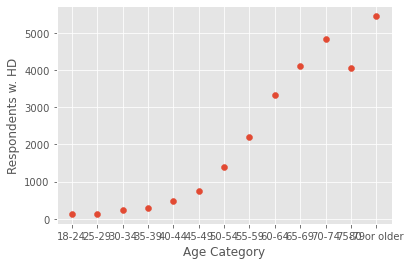

In [269]:
plt.scatter(agecat_subset.index, agecat_subset['Respondents w. HD'])
plt.xlabel('Age Category')
plt.ylabel('Respondents w. HD')

In [239]:
subset2 = dataset[['Race', 'HeartDisease']]
total_resp2 = subset2.shape[0]

race_split = subset2.groupby('Race').count()
race_split.columns = race_split.columns.str.replace('HeartDisease', 'Num Respondents')
race_split['Share of Total'] = race_split.apply(lambda x: round((x / total_resp2) * 100, 2), axis = 0) # add new column that calculates % of total respondents by race


"""
Create new dataframe breaking out respondents with heart disease, by sex.

"""
has_hd2 = subset2[subset2['HeartDisease'] == 'Yes'] # total respondents w. heart disease, broken out by race
has_hd_total2 = has_hd2.shape[0]

has_hd_race = has_hd2.groupby('Race').count()
has_hd_race.columns = has_hd_race.columns.str.replace('HeartDisease', 'Respondents w. HD')
has_hd_race['Share of Total w. HD'] = has_hd_race.apply(lambda x: round((x / has_hd_total2) * 100, 2), axis = 0)

"""
Concatenate both dataframes
"""

pd.concat([race_split, has_hd_race], axis = 1, join = 'inner')



,Num Respondents,Share of Total,Respondents w. HD,Share of Total w. HD
Race,,,,
American Indian/Alaskan Native,5202,1.63,542,1.98
Asian,8068,2.52,266,0.97
Black,22939,7.17,1729,6.32
Hispanic,27446,8.58,1443,5.27
Other,10928,3.42,886,3.24
White,245212,76.68,22507,82.22


Explore Relationship between lifestyle and presence of heart disease.

In [786]:
hd_ = dataset[dataset['HeartDisease'] == 'Yes']
hd_total = hd_.shape[0]

nohd_ = dataset[dataset['HeartDisease'] == 'No']
nohd_total = nohd_.shape[0]

In [796]:
#compare smoking rate
hd_smoke = pd.DataFrame(hd_[['Smoking']].value_counts())
hd_smoke = hd_smoke.reset_index()
hd_smoke.columns = ['Smoking', 'NumRespondents']
hd_smoke['% of Total Respondents'] = round(hd_smoke.NumRespondents / hd_total * 100, 2)

print(hd_smoke)

nohd_smoke = pd.DataFrame(nohd_[['Smoking']].value_counts())
nohd_smoke = nohd_smoke.reset_index()
nohd_smoke.columns = ['Smoking', 'NumRespondents']
nohd_smoke['% of Total Respondents'] = round(nohd_smoke.NumRespondents / nohd_total * 100, 2)

print(nohd_smoke)


  Smoking  NumRespondents  % of Total Respondents
0     Yes           16037                   58.59
1      No           11336                   41.41
  Smoking  NumRespondents  % of Total Respondents
0      No          176551                   60.38
1     Yes          115871                   39.62


In [799]:
#compare alcohol drinking rate
hd_alcohol = pd.DataFrame(hd_[['AlcoholDrinking']].value_counts())
hd_alcohol = hd_alcohol.reset_index()
hd_alcohol.columns = ['AlcoholDrinking', 'NumRespondents']
hd_alcohol['% of Total Respondents'] = round(hd_alcohol.NumRespondents / hd_total * 100, 2)

print(hd_alcohol)

nohd_alcohol = pd.DataFrame(nohd_[['AlcoholDrinking']].value_counts())
nohd_alcohol = nohd_alcohol.reset_index()
nohd_alcohol.columns = ['AlcoholDrinking', 'NumRespondents']
nohd_alcohol['% of Total Respondents'] = round(nohd_alcohol.NumRespondents / nohd_total * 100, 2)

print(nohd_alcohol)



  AlcoholDrinking  NumRespondents  % of Total Respondents
0              No           26232                   95.83
1             Yes            1141                    4.17
  AlcoholDrinking  NumRespondents  % of Total Respondents
0              No          271786                   92.94
1             Yes           20636                    7.06


In [1146]:
#compare physical activity rate
hd_activity = pd.DataFrame(hd_[['PhysicalActivity']].value_counts())
hd_activity = hd_activity.reset_index()
hd_activity.columns = ['PhysicalActivity', 'NumRespondents']
hd_activity['% of Total Respondents'] = round(hd_activity.NumRespondents / hd_total * 100, 2)

print(hd_activity)

nohd_activity = pd.DataFrame(nohd_[['PhysicalActivity']].value_counts())
nohd_activity = nohd_activity.reset_index()
nohd_activity.columns = ['PhysicalActivity', 'NumRespondents']
nohd_activity['% of Total Respondents'] = round(nohd_activity.NumRespondents / nohd_total * 100, 2)

print(nohd_activity)

  PhysicalActivity  NumRespondents  % of Total Respondents
0              Yes           17489                   63.89
1               No            9884                   36.11
  PhysicalActivity  NumRespondents  % of Total Respondents
0              Yes          230468                   78.81
1               No           61954                   21.19


In [1078]:
#compare sleep time
hd_med_st = hd_[hd_['SleepTime'] <= 12].SleepTime.median()
nohd_med_st = nohd_[nohd_['SleepTime'] <= 12].SleepTime.median()

print(hd_med_st)
print(nohd_med_st)

7.0
7.0


In [1149]:
#compare BMI 

def segments(x): #segment BMI values into ranges
    if 10 <= x < 20: 
         return'10-20'
    elif 20 <= x < 30: 
        return'20-30'
    elif 30 <= x < 40: 
        return'30-40'
    elif 40 <= x < 50: 
        return'40-50'
    else:
        return'50+' 
    
    
bmi_split = dataset[['HeartDisease', 'BMI']]
bmi_split['BMI_Range'] = bmi_split.BMI.map(lambda x: segments(x))

bmi_split_hd = bmi_split[bmi_split['HeartDisease'] == 'Yes'].groupby('BMI_Range').count().drop('BMI', 1)
bmi_split_hd.columns = ['Has_HeartDisease']

bmi_split_nohd = bmi_split[bmi_split['HeartDisease'] == 'No'].groupby('BMI_Range').count().drop('BMI', 1)
bmi_split_nohd.columns = ['No_HeartDisease']

bmi_merged = pd.merge(bmi_split_hd, bmi_split_nohd, on = 'BMI_Range')
bmi_merged['% with Heart Disease'] = bmi_merged.Has_HeartDisease / sum(bmi_merged.Has_HeartDisease, bmi_merged.No_HeartDisease) * 100
bmi_merged

/var/folders/s8/vggb8y7d5d9g80zjhkq3yrnw00k1r5/T/ipykernel_803/2431131641.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_split['BMI_Range'] = bmi_split.BMI.map(lambda x: segments(x))
/var/folders/s8/vggb8y7d5d9g80zjhkq3yrnw00k1r5/T/ipykernel_803/2431131641.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  bmi_split_hd = bmi_split[bmi_split['HeartDisease'] == 'Yes'].groupby('BMI_Range').count().drop('BMI', 1)
/var/folders/s8/vggb8y7d5d9g80zjhkq3yrnw00k1r5/T/ipykernel_803/2431131641.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  bmi_split_nohd = bmi_split[bmi

,Has_HeartDisease,No_HeartDisease,% with Heart Disease
BMI_Range,,,
10-20,963,13670,2.346320
20-30,15738,186582,7.355752
30-40,8860,77597,8.440507
40-50,1524,12344,3.837148
50+,288,2229,0.972907


Finally, analyze data to see if the rates of heart disease increase along with the rates of other serious medical conditions—most notably stroke and diabetes.  

In [997]:
excond = dataset[['HeartDisease', 'Stroke', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']]

In [1045]:
stro_hd = excond[['HeartDisease', 'Stroke']][excond['HeartDisease'] == 'Yes'].groupby('Stroke').count()
stro_hd['% of Total Respondents'] = round(stro_hd.HeartDisease / sum(stro_hd.HeartDisease) * 100, 2)
stro_hd.columns = ['Num_Respondents', '% of Total Respondents']
print(stro_hd)

stro_nohd = excond[['HeartDisease', 'Stroke']][excond['HeartDisease'] == 'No'].groupby('Stroke').count()
stro_nohd['% of Total Respondents'] = round(stro_nohd.HeartDisease / sum(stro_nohd.HeartDisease) * 100, 2)
stro_nohd.columns = ['Num_Respondents', '% of Total Respondents']
print(stro_nohd)


        Num_Respondents  % of Total Respondents
Stroke                                         
No                22984                   83.97
Yes                4389                   16.03
        Num_Respondents  % of Total Respondents
Stroke                                         
No               284742                   97.37
Yes                7680                    2.63


In [1042]:
diab_hd = excond[['HeartDisease', 'Diabetic']][excond['HeartDisease'] == 'Yes'].groupby('Diabetic').count()
diab_hd['% of Total Respondents'] = round(diab_hd.HeartDisease / sum(diab_hd.HeartDisease) * 100, 2)
diab_hd.columns = ['Num_Respondents', '% of Total Respondents']
print(diab_hd)

diab_nohd = excond[['HeartDisease', 'Diabetic']][excond['HeartDisease'] == 'No'].groupby('Diabetic').count()
diab_nohd['% of Total Respondents'] = round(diab_nohd.HeartDisease / sum(diab_nohd.HeartDisease) * 100, 2)
diab_nohd.columns = ['Num_Respondents', '% of Total Respondents']
print(diab_nohd)


                         Num_Respondents  % of Total Respondents
Diabetic                                                        
No                                 17519                   64.00
No, borderline diabetes              789                    2.88
Yes                                 8957                   32.72
Yes (during pregnancy)               108                    0.39
                         Num_Respondents  % of Total Respondents
Diabetic                                                        
No                                252134                   86.22
No, borderline diabetes             5992                    2.05
Yes                                31845                   10.89
Yes (during pregnancy)              2451                    0.84
